### Data Input

In [127]:
import pandas as pd

student_df = pd.read_csv("../data/student-mat.csv", delimiter=';')
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Data Preprocessing

In [128]:
import numpy as np
from sklearn import preprocessing
from sklearn.utils import shuffle

need_drop_rows = []

sdf_index = 0

for colname in student_df.columns[:len(student_df.columns)-1]:
    
    # this feature is categorical, we do one-hot encode
    if type(student_df[colname][0]) != np.int64:
        count = 0
        record_dict = {}
        for ele in student_df[colname]:
            if ele not in record_dict.keys():
                record_dict[ele] = count
                count += 1
        
        new_column = []
        for ele in student_df[colname]:
            new_column.append(record_dict[ele])
        
        student_df[colname] = new_column


# shuffle the data
student_df = shuffle(student_df)


In [129]:
# define binary classification function
def binary_target(df):
    g3List = df["G3"]
    binary_list = []
    
    for ele in g3List:
        if int(ele) >= 10:
            binary_list.append(1)
        else:
            binary_list.append(0)
    
    df["G3"] = binary_list
    return df

    
# define five_level classification function
def five_level_target(df):
    g3List = df["G3"]
    five_level_list = []
    
    for ele in g3List:
        if int(ele) >= 0 and int(ele) <= 9:
            five_level_list.append("F")
        elif int(ele) >= 10 and int(ele) <= 11:
            five_level_list.append("D")
        elif int(ele) >= 12 and int(ele) <= 13:
            five_level_list.append("C")
        elif int(ele) >= 14 and int(ele) <= 15:
            five_level_list.append("B")
        else:
            five_level_list.append("A")
    
    df["G3"] = five_level_list
    return df

### Model Construction

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn import tree
from sklearn.decomposition import PCA

pca_num_of_components = 15

# construct decision tree algorithm
def decision_tree_clf(is_pca, training_sample, training_target, testing_sample, testing_target, want_plot):
    clf = DecisionTreeClassifier()
    
    predict_list = []
    
    if is_pca:
        pca = PCA(n_components = pca_num_of_components)
        x_training_sample = pca.fit_transform(training_sample)
        x_testing_sample = pca.fit_transform(testing_sample)

        clf.fit(x_training_sample, training_target.values.ravel())
        predict_list = clf.predict(x_testing_sample)
    else:
        clf.fit(training_sample, training_target.values.ravel())
        predict_list = clf.predict(testing_sample)
        
    if want_plot:
        tree.plot_tree(clf)
    
    result_list = []
    result_list.append(confusion_matrix(testing_target, predict_list))
    result_list.append(accuracy_score(testing_target, predict_list))
    result_list.append(recall_score(testing_target, predict_list, average='macro'))
    result_list.append(precision_score(testing_target, predict_list, average='macro'))
    return result_list

def random_forest_clf(is_pca, training_sample, training_target, testing_sample, testing_target, num_of_tree):
    clf = RandomForestClassifier(n_estimators = num_of_tree)
    
    predict_list = []
    
    if is_pca:
        pca = PCA(n_components = pca_num_of_components)
        x_training_sample = pca.fit_transform(training_sample)
        x_testing_sample = pca.fit_transform(testing_sample)

        clf.fit(x_training_sample, training_target.values.ravel())
        predict_list = clf.predict(x_testing_sample)
    else:
        clf.fit(training_sample, training_target.values.ravel())
        predict_list = clf.predict(testing_sample)
    
    result_list = []
    result_list.append(confusion_matrix(testing_target, predict_list))
    result_list.append(accuracy_score(testing_target, predict_list))
    result_list.append(recall_score(testing_target, predict_list, average='macro'))
    result_list.append(precision_score(testing_target, predict_list, average='macro'))
    return result_list

def knn_clf(is_pca, training_sample, training_target, testing_sample, testing_target, k_value, want_plot):
    clf = KNeighborsClassifier(n_neighbors = k_value)
    
    predict_list = []
    
    if is_pca:
        pca = PCA(n_components = pca_num_of_components)
        x_training_sample = pca.fit_transform(training_sample)
        x_testing_sample = pca.fit_transform(testing_sample)

        clf.fit(x_training_sample, training_target.values.ravel())
        predict_list = clf.predict(x_testing_sample)
    else:
        clf.fit(training_sample, training_target.values.ravel())
        predict_list = clf.predict(testing_sample)
        
    if want_plot:
        tree.plot_tree(clf)
    
    result_list = []
    result_list.append(confusion_matrix(testing_target, predict_list))
    result_list.append(accuracy_score(testing_target, predict_list))
    result_list.append(recall_score(testing_target, predict_list, average='macro'))
    result_list.append(precision_score(testing_target, predict_list, average='macro'))
    return result_list

### Validation (With Binary Target)

In [131]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from prettytable import PrettyTable

def k3_validate(df):
    # result_dict dict value [[confusion matrix, accuracy, recall, precision]]
    kf = KFold(n_splits=3)
    
    result_dict = {\
        "is_p_ds_pre": [], \
        "not_p_ds_pre": [], \

        "is_p_rf_pre_20": [],\
        "is_p_rf_pre_30": [],\
        "is_p_rf_pre_40": [],\
        "not_p_rf_pre_20": [],\
        "not_p_rf_pre_30": [],\
        "not_p_rf_pre_40": [],\

        "is_p_knn_pre_15": [],\
        "is_p_knn_pre_20": [],\
        "is_p_knn_pre_25": [],\
        "not_p_knn_pre_15": [],\
        "not_p_knn_pre_20": [],\
        "not_p_knn_pre_30": [],\
    }
    
    target_array = df["G3"]
    sample_df = df.drop("G3", 1)
    target_df = pd.DataFrame(target_array, columns = ["G3"])

    for train_index, test_index in kf.split(df):
        result_dict["not_p_ds_pre"].append(decision_tree_clf(False, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], False))
        result_dict["is_p_ds_pre"].append(decision_tree_clf(True, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], False))
        
        result_dict["not_p_rf_pre_20"].append(random_forest_clf(False, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 20))
        result_dict["not_p_rf_pre_30"].append(random_forest_clf(False, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 30))
        result_dict["not_p_rf_pre_40"].append(random_forest_clf(False, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 40))
        result_dict["is_p_rf_pre_20"].append(random_forest_clf(True, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 20))
        result_dict["is_p_rf_pre_30"].append(random_forest_clf(True, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 30))
        result_dict["is_p_rf_pre_40"].append(random_forest_clf(True, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 40))

        result_dict["not_p_knn_pre_15"].append(knn_clf(False, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 15, False))
        result_dict["not_p_knn_pre_20"].append(knn_clf(False, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 20, False))
        result_dict["not_p_knn_pre_30"].append(knn_clf(False, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 25, False))
        result_dict["is_p_knn_pre_15"].append(knn_clf(True, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 15, False))
        result_dict["is_p_knn_pre_20"].append(knn_clf(True, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 20, False))
        result_dict["is_p_knn_pre_25"].append(knn_clf(True, sample_df.iloc[train_index], target_df.iloc[train_index], sample_df.iloc[test_index], target_df.iloc[test_index], 25, False))
        
        
    # calculation_dict dict value [confusion matrix, accuracy, recall, precision]
    calculation_dict = {}

    for k in result_dict:
        final_confusion_matrix = np.add(result_dict[k][0][0], result_dict[k][1][0])
        final_confusion_matrix = np.add(final_confusion_matrix, result_dict[k][2][0])

        final_confusion_matrix = [[float(y) for y in x] for x in final_confusion_matrix]

        for i in range(len(final_confusion_matrix)):
            for j in range(len(final_confusion_matrix[i])):
                final_confusion_matrix[i][j] = float(final_confusion_matrix[i][j] / 3.0)

        final_confusion_matrix = np.array(final_confusion_matrix)

        accuracy_list = []
        recall_list = []
        precision_list = []

        for r in result_dict[k]:
            accuracy_list.append(r[1])
            recall_list.append(r[2])
            precision_list.append(r[3])

        final_accuracy = sum(accuracy_list) / 3
        final_recall = sum(recall_list) / 3
        final_precision = sum(precision_list) / 3

        calculation_dict[k] = [final_confusion_matrix, final_accuracy, final_recall, final_precision]



    x = PrettyTable()

    x.field_names = ["Showing", "Confusion Matrix", "Accuracy", "Recall", "Precision"]

    x.add_row(["decision tree with PCA", calculation_dict["is_p_ds_pre"][0], calculation_dict["is_p_ds_pre"][1], calculation_dict["is_p_ds_pre"][2], calculation_dict["is_p_ds_pre"][3]])
    x.add_row(["decision tree without PCA", calculation_dict["not_p_ds_pre"][0], calculation_dict["not_p_ds_pre"][1], calculation_dict["not_p_ds_pre"][2], calculation_dict["not_p_ds_pre"][3]])

    x.add_row(["random forest 20 trees with PCA", calculation_dict["is_p_rf_pre_20"][0], calculation_dict["is_p_rf_pre_20"][1], \
               calculation_dict["is_p_rf_pre_20"][2], calculation_dict["is_p_rf_pre_20"][3]])
    x.add_row(["random forest 30 trees with PCA", calculation_dict["is_p_rf_pre_30"][0], calculation_dict["is_p_rf_pre_30"][1], \
               calculation_dict["is_p_rf_pre_30"][2], calculation_dict["is_p_rf_pre_30"][3]])
    x.add_row(["random forest 40 trees with PCA", calculation_dict["is_p_rf_pre_40"][0], calculation_dict["is_p_rf_pre_40"][1], \
               calculation_dict["is_p_rf_pre_40"][2], calculation_dict["is_p_rf_pre_40"][3]])
    x.add_row(["random forest 20 trees without PCA", calculation_dict["not_p_rf_pre_20"][0], calculation_dict["not_p_rf_pre_20"][1], \
               calculation_dict["not_p_rf_pre_20"][2], calculation_dict["not_p_rf_pre_20"][3]])
    x.add_row(["random forest 30 trees without PCA", calculation_dict["not_p_rf_pre_30"][0], calculation_dict["not_p_rf_pre_30"][1], \
               calculation_dict["not_p_rf_pre_30"][2], calculation_dict["not_p_rf_pre_30"][3]])
    x.add_row(["random forest 40 trees without PCA", calculation_dict["not_p_rf_pre_40"][0], calculation_dict["not_p_rf_pre_40"][1], \
               calculation_dict["not_p_rf_pre_40"][2], calculation_dict["not_p_rf_pre_40"][3]])

    x.add_row(["KNN k=15 with PCA", calculation_dict["is_p_knn_pre_15"][0], calculation_dict["is_p_knn_pre_15"][1], \
               calculation_dict["is_p_knn_pre_15"][2], calculation_dict["is_p_knn_pre_15"][3]])
    x.add_row(["KNN k=20 with PCA", calculation_dict["is_p_knn_pre_20"][0], calculation_dict["is_p_knn_pre_20"][1], \
               calculation_dict["is_p_knn_pre_20"][2], calculation_dict["is_p_knn_pre_20"][3]])
    x.add_row(["KNN k=25 with PCA", calculation_dict["is_p_knn_pre_25"][0], calculation_dict["is_p_knn_pre_25"][1], \
               calculation_dict["is_p_knn_pre_25"][2], calculation_dict["is_p_knn_pre_25"][3]])
    x.add_row(["KNN k=15 without PCA", calculation_dict["not_p_knn_pre_15"][0], calculation_dict["not_p_knn_pre_15"][1], \
               calculation_dict["not_p_knn_pre_15"][2], calculation_dict["not_p_knn_pre_15"][3]])
    x.add_row(["KNN k=20 without PCA", calculation_dict["not_p_knn_pre_20"][0], calculation_dict["not_p_knn_pre_20"][1], \
               calculation_dict["not_p_knn_pre_20"][2], calculation_dict["not_p_knn_pre_20"][3]])
    x.add_row(["KNN k=25 without PCA", calculation_dict["not_p_knn_pre_30"][0], calculation_dict["not_p_knn_pre_30"][1], \
               calculation_dict["not_p_knn_pre_30"][2], calculation_dict["not_p_knn_pre_30"][3]])

    print(x)

    
binary_df = student_df.copy()
binary_df = binary_target(binary_df)
k3_validate(binary_df)

+------------------------------------+-----------------------------+--------------------+--------------------+--------------------+
|              Showing               |       Confusion Matrix      |      Accuracy      |       Recall       |     Precision      |
+------------------------------------+-----------------------------+--------------------+--------------------+--------------------+
|       decision tree with PCA       |  [[21.         22.33333333] | 0.6686714472974016 | 0.6126095290251917 | 0.6350864499482801 |
|                                    |  [21.33333333 67.        ]] |                    |                    |                    |
|     decision tree without PCA      |  [[34.66666667  8.66666667] | 0.8606484694270954 | 0.8449503245599725 | 0.8431071223670191 |
|                                    |  [ 9.66666667 78.66666667]] |                    |                    |                    |
|  random forest 20 trees with PCA   |  [[23.66666667 19.66666667] | 0.68143

### Validation (With 5level Target)

In [132]:
level_df = student_df.copy()
level_df = five_level_target(level_df)
k3_validate(level_df)

+------------------------------------+-----------------------------------------------------------------+---------------------+---------------------+---------------------+
|              Showing               |                         Confusion Matrix                        |       Accuracy      |        Recall       |      Precision      |
+------------------------------------+-----------------------------------------------------------------+---------------------+---------------------+---------------------+
|       decision tree with PCA       |  [[ 6.33333333  0.66666667  0.          0.33333333  6.        ] |  0.4357891896059835 |  0.4522137530909462 |  0.4097089505819525 |
|                                    |   [ 2.33333333  6.66666667  2.66666667  2.66666667  5.66666667] |                     |                     |                     |
|                                    |   [ 1.          5.          5.66666667  6.33333333  2.66666667] |                     |                   

### Decision tree Question

In [133]:
import graphviz 
import os

kf = KFold(n_splits=3)
q_df = student_df.copy()
q_df = binary_target(q_df)
target_array = q_df["G3"]
sample_df = q_df.drop("G3", 1)
target_df = pd.DataFrame(target_array, columns = ["G3"])
count = 0

os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin/'

for  train_index, test_index in kf.split(q_df):
    if count == 0: 
        clf = DecisionTreeClassifier(max_depth=4)
        clf.fit(sample_df.iloc[train_index], target_df.iloc[train_index].values.ravel())
        
        dot_data = tree.export_graphviz(clf, out_file=None, feature_names=sample_df.columns[:], class_names=['0', '1'], filled=True)
        count += 1
        
        graph = graphviz.Source(dot_data, format="png") 
        graph.render("Q1")
        
        print(sample_df.iloc[test_index][])
        

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
53        0    0   15        0        0        1     4     4     3     2  ...   
215       0    0   17        0        1        1     3     2     2     1  ...   
225       0    0   18        1        0        1     3     1     2     1  ...   
141       0    1   16        0        1        1     2     2     3     2  ...   
295       0    1   17        0        0        1     3     3     1     1  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
133       0    0   16        0        0        0     3     4     3     1  ...   
27        0    1   15        0        0        1     4     2     1     2  ...   
196       0    1   17        0        0        1     4     4     3     0  ...   
66        0    1   15        0        0        0     4     4     2     2  ...   
21        0    1   15        0        0        1     4     4     1     3  ...   

     romantic  famrel  free

### KNN Question

In [134]:
count = 0
for  train_index, test_index in kf.split(q_df):
    if count == 0: 
        count += 1
        clf = KNeighborsClassifier(n_neighbors = 3)
        clf.fit(sample_df.iloc[train_index], target_df.iloc[train_index].values.ravel())
        
        one_test_data = sample_df.iloc[test_index[0]]
        dis_list, index_list = clf.kneighbors(X = [one_test_data], n_neighbors = 3)
        predict = clf.predict([one_test_data])
    
        for i in range(len(dis_list[0])):
            print("data: ")
            print(sample_df.iloc[train_index].iloc[[index_list[0][i]]])
            print("----------------------------------------")
            print("distance: ")
            print(dis_list[0][i])
            print("----------------------------------------")
            print("label: ")
            print(target_df.iloc[train_index].iloc[[index_list[0][i]]])
            print("\n\n")
        
        print("predict: ")
        print(predict[0])
        


data: 
     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
142       0    0   15        0        0        1     4     4     4     2  ...   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
142         0       4         2      2     1     1       5         2   9  11  

[1 rows x 32 columns]
----------------------------------------
distance: 
4.898979485566356
----------------------------------------
label: 
     G3
142   1



data: 
    school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
30       0    1   15        0        0        1     4     4     1     2  ...   

    romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
30         0       5         4      2     3     4       5         0   9  11  

[1 rows x 32 columns]
----------------------------------------
distance: 
5.0
----------------------------------------
label: 
    G3
30   1



data: 
    school  sex  age  address  fams

### PCA Question

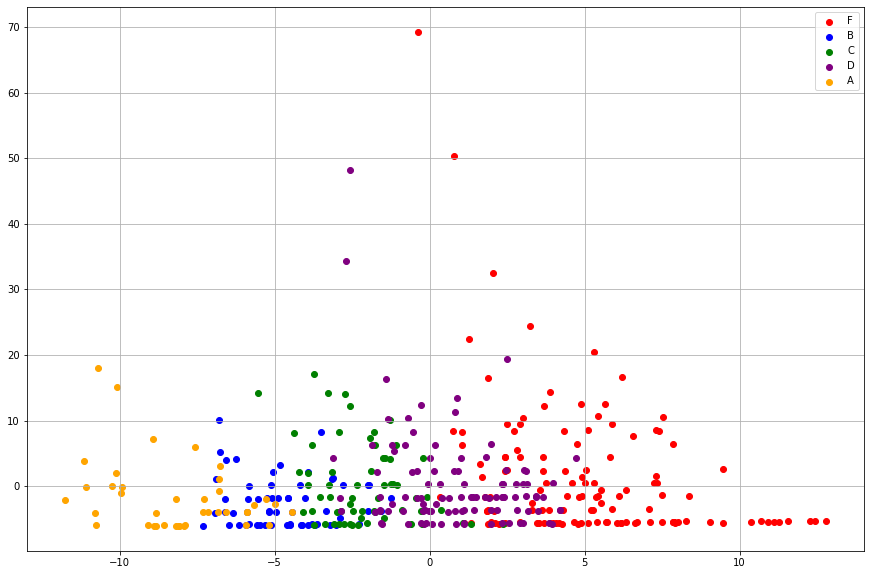

In [126]:
import matplotlib.pyplot as plt

df5 = student_df.copy()
df5 = five_level_target(df5)
pca = PCA(n_components = 2)

target_array = np.array(df5["G3"])
sample_df = df5.drop("G3", 1)

x_df5 = pca.fit_transform(sample_df)

cat_dict = {}

for i in range(len(target_array)):
    tar = str(target_array[i])
    if tar in cat_dict.keys():
        cat_dict[tar][0].append(x_df5[i][0])
        cat_dict[tar][1].append(x_df5[i][1])
    else:
        cat_dict[tar] = [[x_df5[i][0]], [x_df5[i][1]]]

color_set = ["red", "blue", "green", "purple", "orange"]
index = 0

fig, ax = plt.subplots(figsize=(15,10))
for k in cat_dict:
    ax.scatter(cat_dict[k][1], cat_dict[k][0], color=color_set[index], label=k)    
    index += 1
    
ax.legend()
ax.grid(True)
plt.show()